In [77]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
#import Dataset
#import Dataset
dataset = pd.read_csv('kc_house_data.csv', header=None, usecols=[2,3,5],names=['Price', 'Bedrooms', 'Size'],skiprows=1,nrows=100)
dataset.head()


,Price,Bedrooms,Size
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


In [79]:
dataset = (dataset - dataset.mean()) / dataset.std()
dataset.insert(0, 'Ones', 1)
dataset.head()

,Ones,Price,Bedrooms,Size
0,1,-0.976183,-0.505454,-1.055998
1,1,0.061907,-0.505454,0.559282
2,1,-1.113785,-1.769089,-1.532448
3,1,0.278654,0.758181,-0.149582
4,1,-0.030047,-0.505454,-0.474962


In [80]:
#Spliting Dataframe into Features(X) and Labels(y)
X = dataset.iloc[:,[0,2,3]]
y = dataset.iloc[:,[1]]

In [81]:
#Displaying Features Dataframe
X.head()

,Ones,Bedrooms,Size
0,1,-0.505454,-1.055998
1,1,-0.505454,0.559282
2,1,-1.769089,-1.532448
3,1,0.758181,-0.149582
4,1,-0.505454,-0.474962


In [82]:
#Displaying Labels Dataframe
y.head()

,Price
0,-0.976183
1,0.061907
2,-1.113785
3,0.278654
4,-0.030047


In [83]:
# implementation of Gradient Descent Algorithm
# X = Feature Matrix.
# y = label Matrix.
# alpha = learning rate.
# iters = no of iterations.
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [84]:
# Calculation of mean Squared error
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [85]:
# Converting Dataframes to numpy Matrix for numaric calculation.
X = np.matrix(X.values)
y = np.matrix(y.values)

#initializing initial theta, learning rate and no of iterations
theta = np.matrix(np.array([0,0,0]))
alpha = 0.01
iters = 1000


#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Compute Gradient
g2, cost2 = gradientDescent(X_train, y_train, theta, alpha, iters)

# get the cost (error) of the model
print("Training error----")
print(computeCost(X_train, y_train, g2))
print("Testing error")
print(computeCost(X_test, y_test, g2))

Training error----
0.318876081973
Testing error
0.164425213102


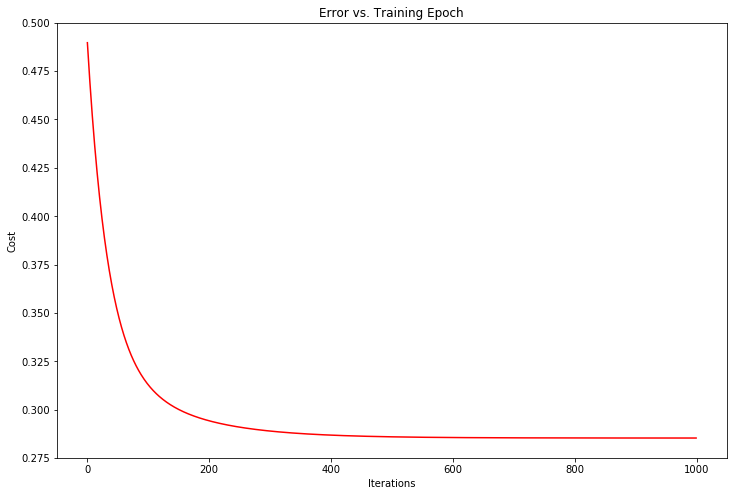

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')